w的L2范数是： 14.721660614013672


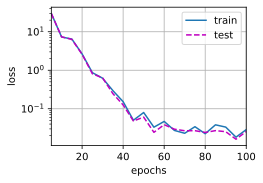

In [7]:
import torch 
from torch import nn
from d2l import torch as d2l
n_train,n_test,num_inputs,batch_size=20,100,200,5
#20个训练数据，100个测试数据，输入维度200，5个训练批次
true_w,true_b=torch.ones((num_inputs,1))*0.01,0.05
train_data=d2l.synthetic_data(true_w,true_b,n_train)
train_iter=d2l.load_array(train_data,batch_size)
test_data=d2l.synthetic_data(true_w,true_b,n_test)
test_iter=d2l.load_array(test_data,batch_size,is_train=False)
#初始化参数
def init_params():
    w=torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b=torch.zeros(1,requires_grad=True)
    return [w,b]
#计算L2的惩罚范数
def l2_penalty(w):
    return torch.sum(w.pow(2))/2
#训练
def train(lambd):
    #初始化参数
    w,b=init_params()
    #设定网络和损失函数，为一个线性层和平方损失
    net,loss =lambda x:d2l.linreg(X,w,b),d2l.squared_loss
    #训练100次，学习率0.003
    num_epochs,lr=100,0.003
    animator=d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y)+lambd *l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if (epoch+1)%5==0:
            animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
    print("w的L2范数是：",torch.norm(w).item())
train(lambd=0)#不采用L2惩罚

w的L2范数是： 0.358451247215271


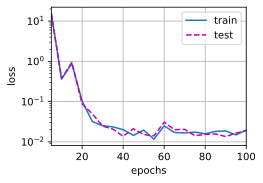

In [8]:
train(lambd=3)#采用L2惩罚，超参数系数为3

w的L2范数： 12.970365524291992


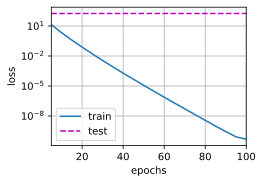

In [14]:
#简洁实现
def train_concise(wd):
    net=nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs,lr=100,0.003
    trainer=torch.optim.SGD([{"params":net[0].weight,'weight_decay':wd},
                            {"params":net[0].bias}],lr=lr)
    animator =d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=["train",'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l=loss(net(X),y)
            l.mean().backward()
            trainer.step()
        if (epoch+1)%5==0:
            animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
    print("w的L2范数：",net[0].weight.norm().item())
train_concise(0)#不进行范数惩罚

w的L2范数： 0.43803784251213074


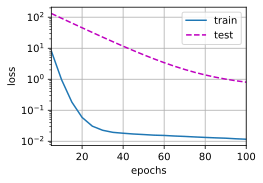

In [16]:
train_concise(3)

In [ ]:
#结论，由此可见，范数惩罚可减少过拟合